# RadRacer Scratch Notebook

Process Pallete first


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sheets/radracer_game.png')

RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
HSV_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
GRAY_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

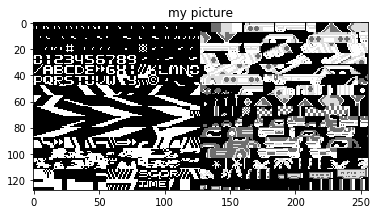

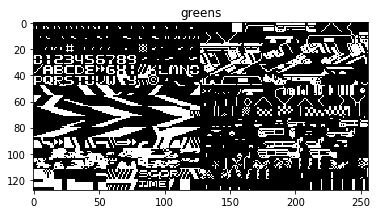

In [2]:
plt.imshow(GRAY_img, cmap='Greys_r')
plt.title('my picture')
plt.show()


_, masked= cv2.threshold(GRAY_img, 250, 255, cv2.THRESH_BINARY)
masked = cv2.bitwise_not(masked)

plt.imshow(masked, cmap="Greys")
plt.title('greens')
plt.show()



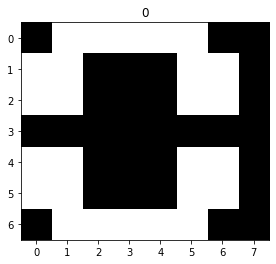

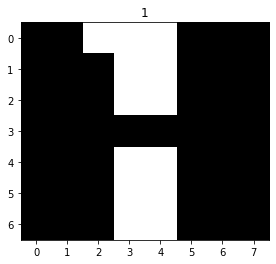

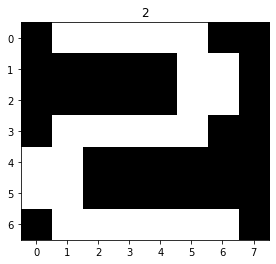

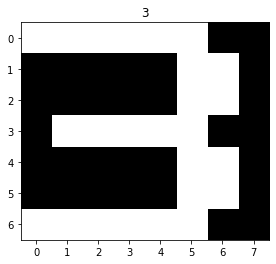

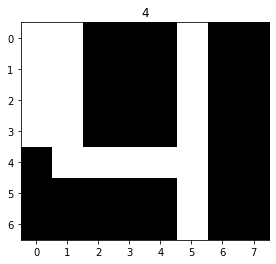

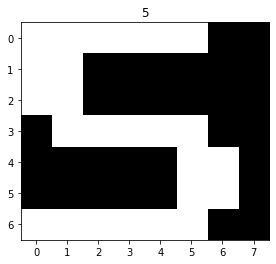

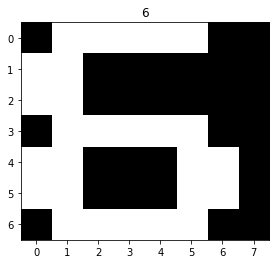

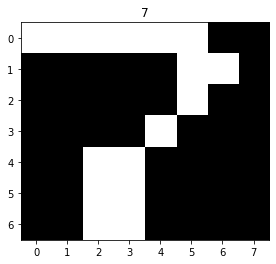

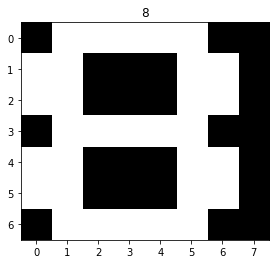

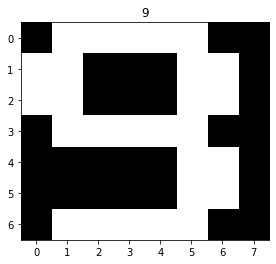

In [3]:
palette_x = 0
digit_images = []
# Digit Images
for digit in range(10):
    origin_palette_x = palette_x + 8 * digit
    digit_images.append(
        masked[25:32, origin_palette_x:origin_palette_x+8]
    )
for i, digit_image in enumerate(digit_images):
    plt.imshow(digit_image, cmap="Greys")
    plt.title(f"{i}")
    plt.show()


## Test out digit reading

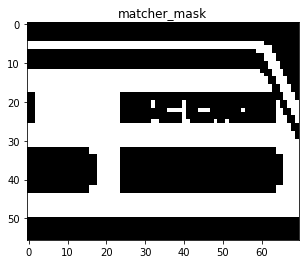

In [4]:
snap_img = cv2.imread('samples/snap_10452.png')
HSV_snap_img = cv2.cvtColor(snap_img, cv2.COLOR_BGR2HSV)
# 32, 23

cropped_image_hsv = HSV_snap_img[168:224, 160:230]
lower_bound = np.array([100, 200, 200])
upper_bound = np.array([140, 255, 255])

matcher_mask = cv2.inRange(cropped_image_hsv, lower_bound, upper_bound)
matcher_mask = cv2.bitwise_not(matcher_mask)

plt.imshow(matcher_mask, cmap="Greys")
plt.title(f"matcher_mask")
plt.show()

Score matcher against green stuff

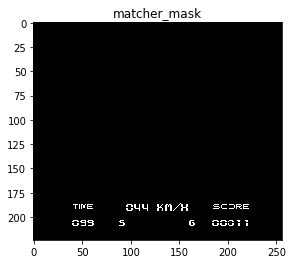

In [5]:
score_img = cv2.imread('samples/snap_10452.png')
score_img_hsv = cv2.cvtColor(score_img, cv2.COLOR_BGR2HSV)
lower_bound = np.array([50, 100, 100])
upper_bound = np.array([100, 255, 255])

matcher_mask = cv2.inRange(score_img_hsv, lower_bound, upper_bound)
matcher_mask = cv2.bitwise_not(matcher_mask)

plt.imshow(matcher_mask, cmap="Greys")
plt.title(f"matcher_mask")
plt.show()

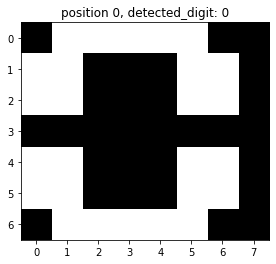

position 0, detected_digit: 0
position 1, detected_digit: 0
position 2, detected_digit: 0
position 3, detected_digit: 1
position 4, detected_digit: 1


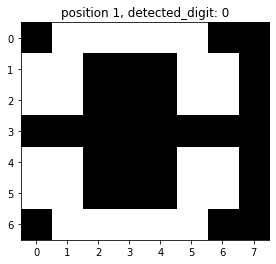

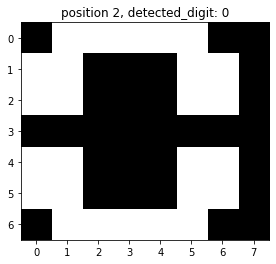

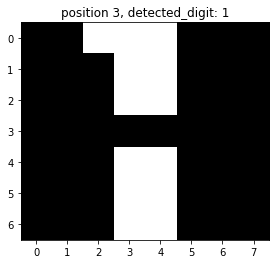

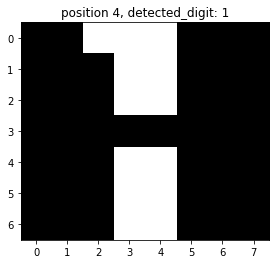

In [11]:
from operator import itemgetter

for i in range(5):
    cropped_digit = matcher_mask[203:210, 184+i*8:(184+8)+i*8]
    detected_digit_and_diff = (None, 99999)
    for num, digit_image in enumerate(digit_images):
        xor_mask = cv2.bitwise_xor(cropped_digit, digit_image)
        count_nonzero = np.count_nonzero(xor_mask)
        # plt.imshow(xor_mask, cmap="Greys")
        # plt.title(f"mask {num}, count_nonzero {count_nonzero}")
        # plt.show()
        if count_nonzero < detected_digit_and_diff[1]:
            detected_digit_and_diff = (num, count_nonzero)
    detected_digit = detected_digit_and_diff[0]

    plt.imshow(cropped_digit, cmap="Greys")
    title = f"position {i}, detected_digit: {detected_digit}"
    plt.title(title)
    plt.show()
    print(title)

# Matcher implementation
